In [2]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
target_db = 'dft-mot-results-and-test-items-2005-to-2020.sqlite'
con = sqlite3.connect(target_db)

In [17]:
df = pd.read_sql_query("""
    SELECT count(*) AS count
    FROM tests
""", con)
df

,count
0,551156668


In [18]:
df = pd.read_sql_query("""
    SELECT make, count(*) AS count
    FROM tests
    WHERE test_class_id=4
    GROUP BY make
    ORDER BY count DESC
    LIMIT 30
""", con)
df.set_index(['make'],inplace=True)
df

,count
make,
FORD,82828425
VAUXHALL,65070483
VOLKSWAGEN,42427312
PEUGEOT,33558312
RENAULT,29739403
TOYOTA,23105501
NISSAN,22162338
BMW,21396662
CITROEN,20749760


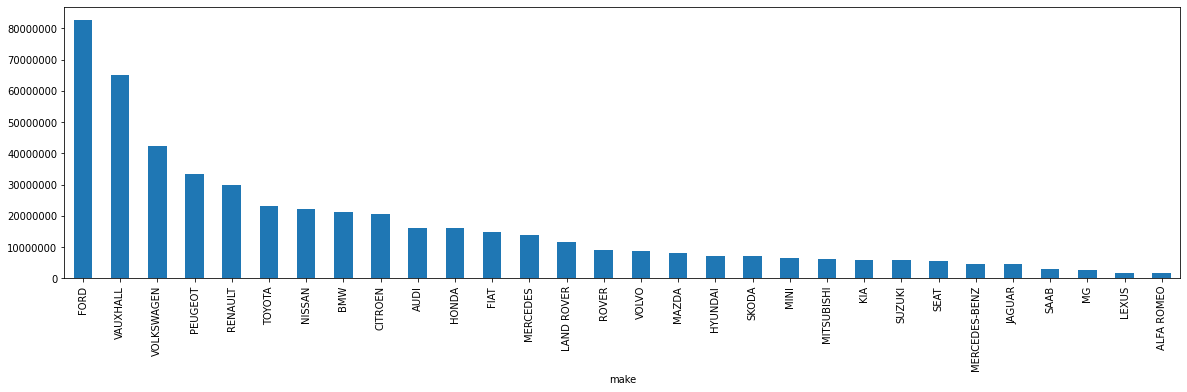

In [19]:
df.plot(kind='bar', figsize=(20,5), legend=None)
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [20]:
df = pd.read_sql_query("""
    SELECT strftime('%Y', test_date) as year, count(*) AS count
    FROM tests
    WHERE test_class_id=4
    GROUP BY year
    ORDER BY year
""", con)
df

,year,count
0,2005,7113089
1,2006,30302568
2,2007,31803974
3,2008,32591753
4,2009,33529083
5,2010,34179326
6,2011,34790696
7,2012,34831846
8,2013,35346508
9,2014,35458346


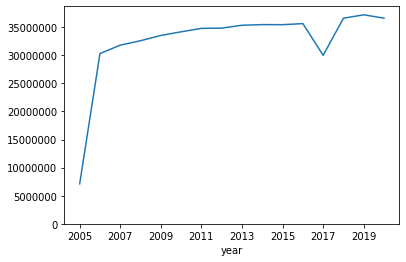

In [25]:
df_by_year = df.set_index(['year'])
df_by_year.plot(legend=None)
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_ylim(ymin=0)
plt.show()

In [7]:
df = pd.read_sql_query("""
    SELECT strftime('%m', test_date) as month, count(*) as count
    FROM tests
    WHERE test_class_id=4 AND test_date NOT LIKE '2015-%' AND test_date NOT LIKE '2017-%'
    GROUP BY month
    ORDER BY month
""", con)
df

,month,count
0,01,34640386
1,02,35490397
2,03,45790431
3,04,36653127
4,05,38309951
5,06,39175555
6,07,39183961
7,08,38247119
8,09,44039877
9,10,41703207


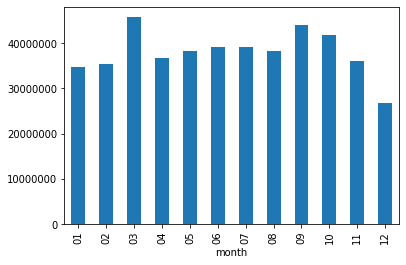

In [9]:
df_by_month = df.set_index(['month'])
df_by_month.plot(kind='bar', legend=None)
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_ylim(ymin=0)
plt.show()

In [10]:
df = pd.read_sql_query("""
    SELECT strftime('%m', test_date) as month, test_result, count(*) as count
    FROM tests
    WHERE test_class_id=4 AND test_date NOT LIKE '2015-%' AND test_date NOT LIKE '2017-%'
    GROUP BY month, test_result
    ORDER BY month, test_result
""", con)
df

,month,test_result,count
0,01,ABA,48952
1,01,ABR,165022
2,01,ABRVE,17
3,01,F,7985924
4,01,P,23999025
...,...,...,...
67,12,ABR,138821
68,12,ABRVE,18
69,12,F,5820085
70,12,P,18931736


<AxesSubplot:xlabel='month'>

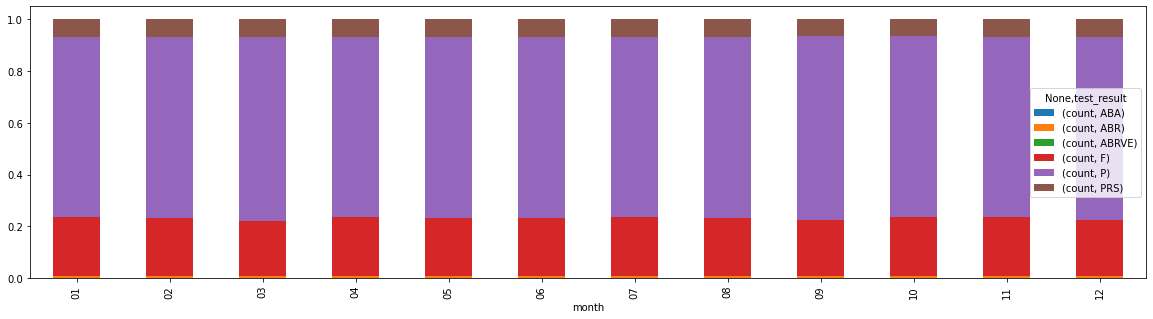

In [32]:
df_by_month = df.set_index(['month'])
df_by_month = df_by_month.pivot_table(index=df_by_month.index, columns='test_result')
df_by_month_normalized = df_by_month.div(df_by_month.sum(axis=1), axis=0)
df_by_month_normalized.plot.bar(stacked=True, figsize=(20,5))